In [1]:
from fastai.vision.all import *
import timm

In [2]:
path = untar_data(URLs.PETS)/'images'

dls = ImageDataLoaders.from_name_func('.',
                                     get_image_files(path), valid_pct=0.2, seed=42,
                                     label_func=RegexLabeller(pat=r'^([^/]+)_\d+'),
                                     item_tfms=Resize(224))

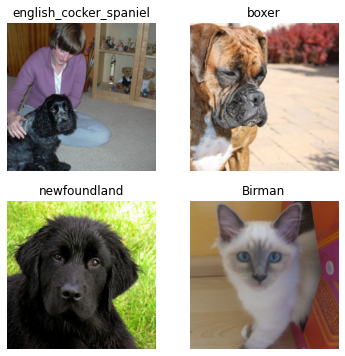

In [3]:
dls.show_batch(max_n=4)

In [4]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

F:\Program Files\Anaconda\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
F:\Program Files\Anaconda\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to C:\Users\Abdullah/.cache\torch\hub\checkpoints\resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.495274,0.318163,0.106225,29:50


epoch,train_loss,valid_loss,error_rate,time
0,0.443158,0.380389,0.113667,36:18
1,0.273916,0.253897,0.077131,35:30
2,0.131193,0.213136,0.064953,34:50


In [7]:
learn.export('model.pkl')

# Try other models

In [ ]:
timm.list_models('convnext*')

In [ ]:
learn = vision_learner(dls, 'convnext_tiny_in22k', metrics=error_rate).to_fp16()
learn.fine_tune(3)

In [9]:
path

Path('C:/Users/Abdullah/.fastai/data/oxford-iiit-pet/images')